In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact

In [95]:
# Load in csv
athelete_df = pd.read_csv("Clean_data.csv")
athelete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,Canada


In [96]:
# Medal Winners for Summer games
athelete_df_summer = athelete_df[(athelete_df['Medal']!='DNW') & (athelete_df['Season']=='Summer')]
athelete_df_summer = athelete_df_summer.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
athelete_df_summer = athelete_df_summer.sort_values('Year')
athelete_df_summer.head()

,Host_Country,Year,region,Medal_Count
534,Greece,1896,United Kingdom,9
533,Greece,1896,Switzerland,3
526,Greece,1896,Australia,3
527,Greece,1896,Austria,5
528,Greece,1896,Denmark,6


In [97]:
#Medal Winners for Winter games
athelete_df_winter = athelete_df[(athelete_df['Medal']!='DNW') & (athelete_df['Season']=='Winter')]
athelete_df_winter = athelete_df_winter.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
athelete_df_winter = athelete_df_winter.sort_values('Year')
athelete_df_winter

,Host_Country,Year,region,Medal_Count
72,France,1924,Austria,4
73,France,1924,Belgium,5
71,France,1924,Australia,1
79,France,1924,Norway,17
80,France,1924,Sweden,9
...,...,...,...,...
283,Russia,2014,United Kingdom,10
282,Russia,2014,Ukraine,5
281,Russia,2014,Switzerland,30
271,Russia,2014,Kazakhstan,1


In [98]:
# performance of USA for summer olympic
USA_df_summer = athelete_df_summer[athelete_df_summer['region'] =='United States of America']
USA_df_summer.head()

,Host_Country,Year,region,Medal_Count
535,Greece,1896,United States of America,20
415,France,1900,United States of America,63
1116,United States of America,1904,United States of America,394
553,Greece,1906,United States of America,24
983,United Kingdom,1908,United States of America,65


In [99]:
# USA as host for summer
USA_summer_host_df = USA_df_summer[(USA_df_summer['region'] =='United States of America') & (USA_df_summer['Host_Country'] =='United States of America')]
USA_summer_host_df.head()

,Host_Country,Year,region,Medal_Count
1116,United States of America,1904,United States of America,394
1143,United States of America,1932,United States of America,189
1189,United States of America,1984,United States of America,352
1267,United States of America,1996,United States of America,259


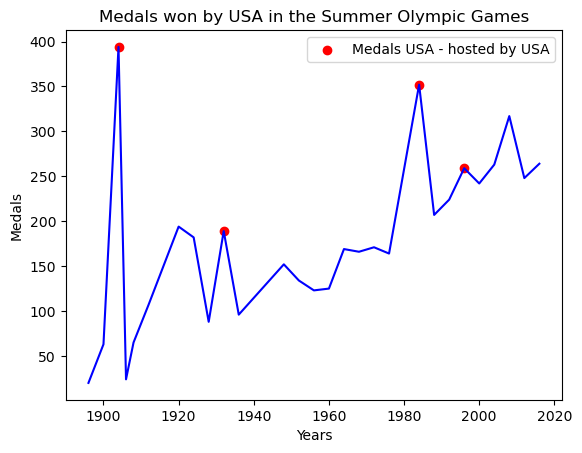

In [100]:
# Plot for Medals by Years
plt.plot(USA_df_summer['Year'], USA_df_summer['Medal_Count'], c='blue')
plt.scatter(USA_summer_host_df['Year'], USA_summer_host_df['Medal_Count'], c='r', label='Medals USA - hosted by USA')

# Title and Axis
plt.title('Medals won by USA in the Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [101]:
# performance of USA for winter olympic
USA_df_winter = athelete_df_winter[athelete_df_winter['region'] =='United States of America']
USA_df_winter.head()

,Host_Country,Year,region,Medal_Count
83,France,1924,United States of America,12
296,Switzerland,1928,United States of America,14
319,United States of America,1932,United States of America,34
128,Germany,1936,United States of America,16
309,Switzerland,1948,United States of America,16


In [102]:
# USA as host for winter
USA_winter_host_df = USA_df_winter[(USA_df_winter['region'] =='United States of America') & (USA_df_winter['Host_Country'] =='United States of America')]
USA_winter_host_df.head()

,Host_Country,Year,region,Medal_Count
319,United States of America,1932,United States of America,34
333,United States of America,1960,United States of America,27
351,United States of America,1980,United States of America,30
375,United States of America,2002,United States of America,84


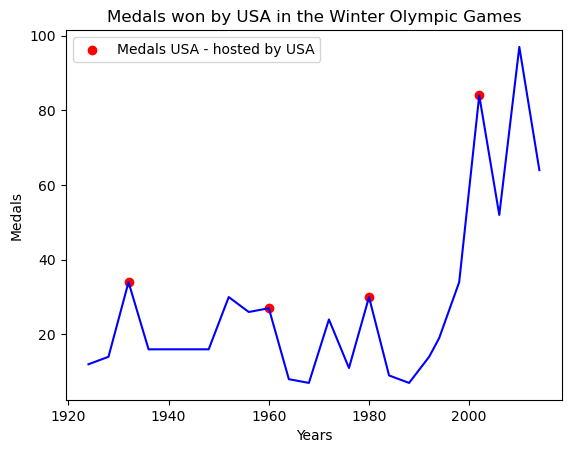

In [103]:
# Plot for Medals by Years
plt.plot(USA_df_winter['Year'], USA_df_winter['Medal_Count'], c='blue')
plt.scatter(USA_winter_host_df['Year'], USA_winter_host_df['Medal_Count'], c='r', label='Medals USA - hosted by USA')

# Title and Axis
plt.title('Medals won by USA in the Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [104]:
# performance of France for summer olympic
France_df_summer = athelete_df_summer[athelete_df_summer['region'] =='France']
France_df_summer.head()

,Host_Country,Year,region,Medal_Count
529,Greece,1896,France,11
400,France,1900,France,235
1109,United States of America,1904,France,2
543,Greece,1906,France,64
972,United Kingdom,1908,France,40


In [105]:
# France as host for summer
France_summer_host_df = France_df_summer[(France_df_summer['region'] =='France') & (France_df_summer['Host_Country'] =='France')]
France_summer_host_df.head()

,Host_Country,Year,region,Medal_Count
400,France,1900,France,235
425,France,1924,France,110


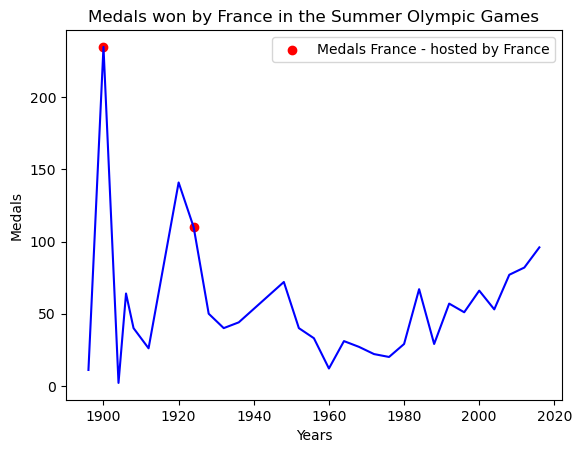

In [106]:
# Plot for Medals by Years
plt.plot(France_df_summer['Year'], France_df_summer['Medal_Count'], c='blue')
plt.scatter(France_summer_host_df['Year'], France_summer_host_df['Medal_Count'], c='r', label='Medals France - hosted by France')

# Title and Axis
plt.title('Medals won by France in the Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [107]:
# performance of France for winter olympic
France_df_winter = athelete_df_winter[athelete_df_winter['region'] =='France']
France_df_winter.head()

,Host_Country,Year,region,Medal_Count
76,France,1924,France,10
290,Switzerland,1928,France,2
313,United States of America,1932,France,2
121,Germany,1936,France,1
302,Switzerland,1948,France,5


In [108]:
# France as host for winter
France_winter_host_df = France_df_winter[(France_df_winter['region'] =='France') & (France_df_winter['Host_Country'] =='France')]
France_winter_host_df.head()

,Host_Country,Year,region,Medal_Count
76,France,1924,France,10
88,France,1968,France,9
103,France,1992,France,12


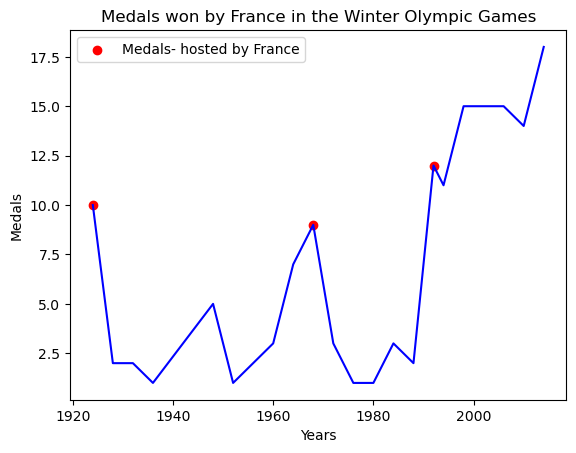

In [109]:
# Plot for Medals by Years
plt.plot(France_df_winter['Year'], France_df_winter['Medal_Count'], c='blue')
plt.scatter(France_winter_host_df['Year'], France_winter_host_df['Medal_Count'], c='r', label='Medals- hosted by France')

# Title and Axis
plt.title('Medals won by France in the Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

In [110]:
host_country_df = athelete_df.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country_df.head(5)

,Host_Country,Year,region,Medal_Count
0,Australia,1956,Afghanistan,12
1,Australia,1956,Argentina,31
2,Australia,1956,Australia,405
3,Australia,1956,Austria,49
4,Australia,1956,Bahamas,5


In [111]:
host_country_medals_df = host_country_df[host_country_df['Host_Country']==host_country_df['region']]
host_country_df_sorted = host_country_df.sort_values(by='Medal_Count', ascending=False)
host_country_medals_df_sorted = host_country_medals_df.sort_values(by='Medal_Count', ascending=False)

In [112]:
host_country_medals_df_sorted.head(5)

,Host_Country,Year,region,Medal_Count
3225,United States of America,1904,United States of America,1109
1071,France,1900,France,1071
1325,Germany,1972,Germany,1041
2950,United Kingdom,1908,United Kingdom,972
3661,United States of America,1996,United States of America,839


In [113]:
host_country_medals_df.head(5)

,Host_Country,Year,region,Medal_Count
2,Australia,1956,Australia,405
74,Australia,2000,Australia,788
265,Austria,1964,Austria,116
302,Austria,1976,Austria,116
337,Belgium,1920,Belgium,518


In [114]:
hosting_countries_df=pd.merge(host_country_df,host_country_medals_df, on=['region'], how='inner')
hosting_countries_df_sorted=hosting_countries_df.sort_values(by='Medal_Count_x', ascending=False)
hosting_countries_df_sorted.head(5)

,Host_Country_x,Year_x,region,Medal_Count_x,Host_Country_y,Year_y,Medal_Count_y
1940,United States of America,1904,United States of America,1109,United States of America,1932,813
1939,United States of America,1904,United States of America,1109,United States of America,1904,1109
1941,United States of America,1904,United States of America,1109,United States of America,1960,105
1942,United States of America,1904,United States of America,1109,United States of America,1980,155
1943,United States of America,1904,United States of America,1109,United States of America,1984,693


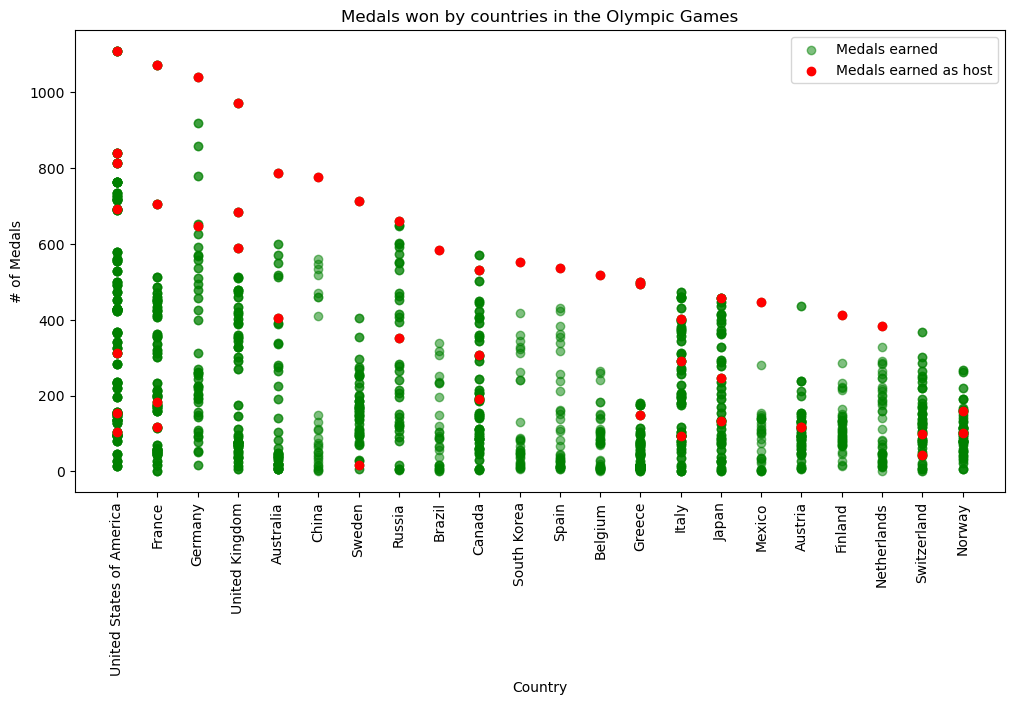

In [115]:
plt.figure(figsize=(12, 6))
plt.scatter(hosting_countries_df_sorted['region'], hosting_countries_df_sorted['Medal_Count_x'], c='g',alpha=0.5, label='Medals earned')
plt.scatter(host_country_medals_df_sorted['region'], host_country_medals_df_sorted['Medal_Count'], c='r',alpha=1.0, label='Medals earned as host')
plt.title('Medals won by countries in the Olympic Games')
plt.xlabel('Country')
plt.ylabel('# of Medals')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [116]:
df = athelete_df[athelete_df['Medal']=='Gold']
df2 = df.groupby(['region'])['Medal'].count().reset_index(name='Gold Count')
df2.head()

,region,Gold Count
0,Algeria,5
1,Argentina,91
2,Armenia,2
3,Australia,368
4,Austria,108


In [117]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data = world.merge(df2, how='right', left_on='name', right_on='region')

fig = px.choropleth(world_data, 
                     locations='iso_a3', 
                     color='Gold Count',
                     hover_name='region', 
                     projection='natural earth',
                     color_continuous_scale='Viridis')

# Update hover information
fig.update_traces(hoverinfo='all', 
                  hovertemplate='Country: %{hovertext}<br>Data: %{customdata[0]}',
                  customdata=world_data[['Gold Count']])

# Show the plot
fig.update_layout(height=800, width=1000)
fig.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_43920\3990371491.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [118]:
# performance of France for summer 
France_df = athelete_df[athelete_df['region'] =='France']
France_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",DNW,France,United Kingdom
145,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,DNW,France,Canada
149,56,Ren Abadie,M,21.0,175.0,71.0,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Individual",DNW,France,Australia
150,56,Ren Abadie,M,21.0,175.0,71.0,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team",Gold,France,Australia
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,China
